Importing all neccesary libraries, silencing deprecation and future warnings

In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from scipy.stats import iqr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)
warnings.filterwarnings('ignore',category=FutureWarning)

Loading the dataset from Google BigQuery

In [258]:
df=pd.io.gbq.read_gbq('SELECT * FROM projekt-zaliczeniowy-401114.movies.movies',project_id='projekt-zaliczeniowy-401114')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Poster_Link      1000 non-null   object 
 1   Series_Title     1000 non-null   object 
 2   Released_Year    1000 non-null   Int64  
 3   Certificate      899 non-null    object 
 4   IMDB_Rating      1000 non-null   float64
 5   Overview         1000 non-null   object 
 6   Meta_score       843 non-null    float64
 7   Director         1000 non-null   object 
 8   Star1            1000 non-null   object 
 9   Star2            1000 non-null   object 
 10  Star3            1000 non-null   object 
 11  Star4            1000 non-null   object 
 12  No_of_Votes      1000 non-null   Int64  
 13  Gross            831 non-null    float64
 14  Runtime_minutes  1000 non-null   Int64  
 15  Genre1           1000 non-null   object 
 16  Genre2           895 non-null    object 
 17  Genre3         

Sample of the dataset

In [259]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Runtime_minutes,Genre1,Genre2,Genre3
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,142,Drama,None,None
1,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Fight Club,1999,A,8.8,An insomniac office worker and a devil-may-car...,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,37030102.0,139,Drama,None,None
2,https://m.media-amazon.com/images/M/MV5BZjA0OW...,One Flew Over the Cuckoo's Nest,1975,A,8.7,A criminal pleads insanity and is admitted to ...,83.0,Milos Forman,Jack Nicholson,Louise Fletcher,Michael Berryman,Peter Brocco,918088,112000000.0,133,Drama,None,None
3,https://m.media-amazon.com/images/M/MV5BOTc2ZT...,Soorarai Pottru,2020,U,8.6,"Nedumaaran Rajangam ""Maara"" sets out to make t...",NaN,Sudha Kongara,Suriya,Madhavan,Paresh Rawal,Aparna Balamurali,54995,NaN,153,Drama,None,None
4,https://m.media-amazon.com/images/M/MV5BZjA0MT...,American History X,1998,R,8.5,A former neo-nazi skinhead tries to prevent hi...,62.0,Tony Kaye,Edward Norton,Edward Furlong,Beverly D'Angelo,Jennifer Lien,1034705,6719864.0,119,Drama,None,None


## Ratings distribution
In this section we will see how the movie ratings on IMDB are distributed.

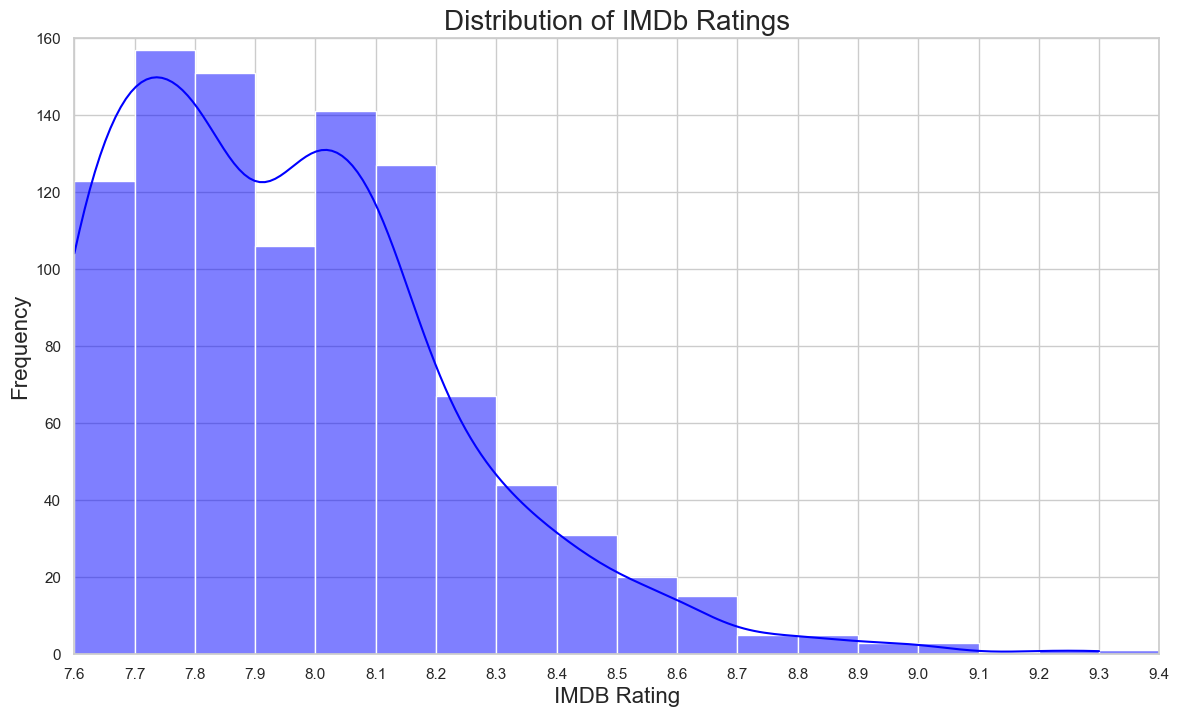

In [260]:
movies_data=df

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting the histogram and a density plot for IMDB ratings
plt.figure(figsize=(14, 8))
sns.histplot(movies_data['IMDB_Rating'], bins=np.arange(7.6,9.4,0.1), kde=True, color='blue')

# Plot enhancements
plt.title('Distribution of IMDb Ratings', fontsize=20)
plt.xticks(np.arange(7.6,9.4,0.1))
plt.xlim(left=7.6,right=9.4)
plt.ylim(top=160)
plt.xlabel('IMDB Rating', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

# Display the plot
plt.show()


Most movies are rated at around 8. Scores above 9/10 are really rare.

## Movie genre popularity
This section tells us how the top 1000 list is populated by different movie genres.

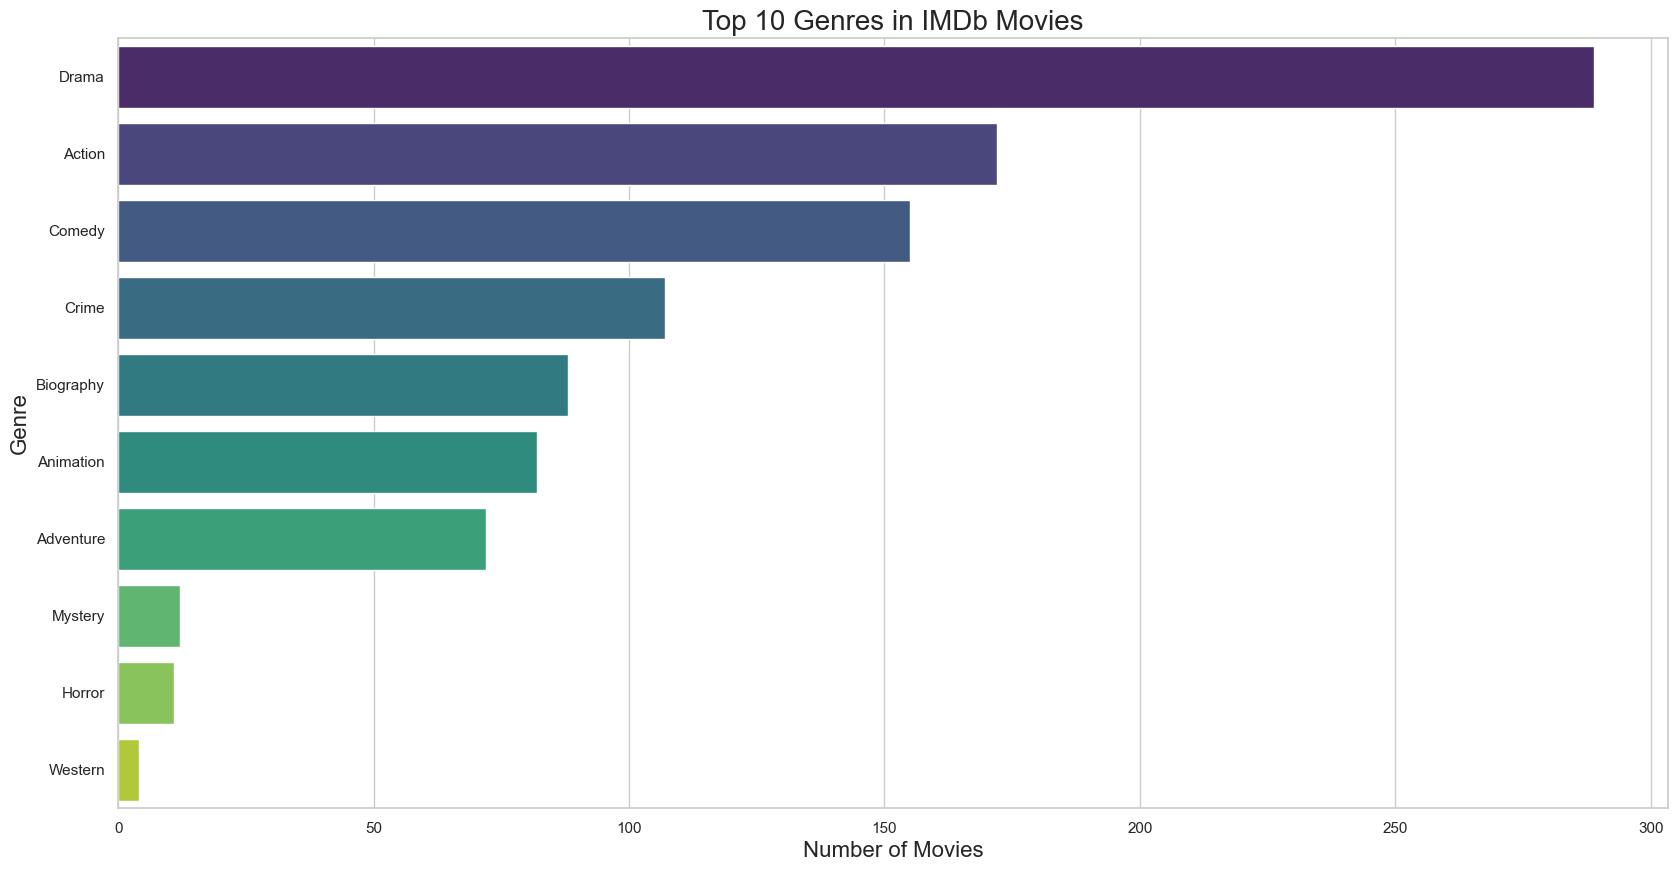

In [261]:
# Splitting the genres for each movie and creating a flat list of all genres
all_genres = movies_data['Genre1']

# Counting the occurrence of each genre
genre_counts = Counter(all_genres)

# Getting the top 10 genres
top_10_genres = dict(genre_counts.most_common(10))

# Creating the horizontal bar plot
plt.figure(figsize=(20, 10))
sns.barplot(x=list(top_10_genres.values()), y=list(top_10_genres.keys()), palette="viridis")

# Plot enhancements
plt.title('Top 10 Genres in IMDb Movies', fontsize=20)
plt.xlabel('Number of Movies', fontsize=16)
plt.ylabel('Genre', fontsize=16)

# Display the plot
plt.show()

Drama is by far dominating the top movies list around the world.

## Movie releases over the years
Here we can see how many of the top 1000 movies were released each year and how were are they rated on average.

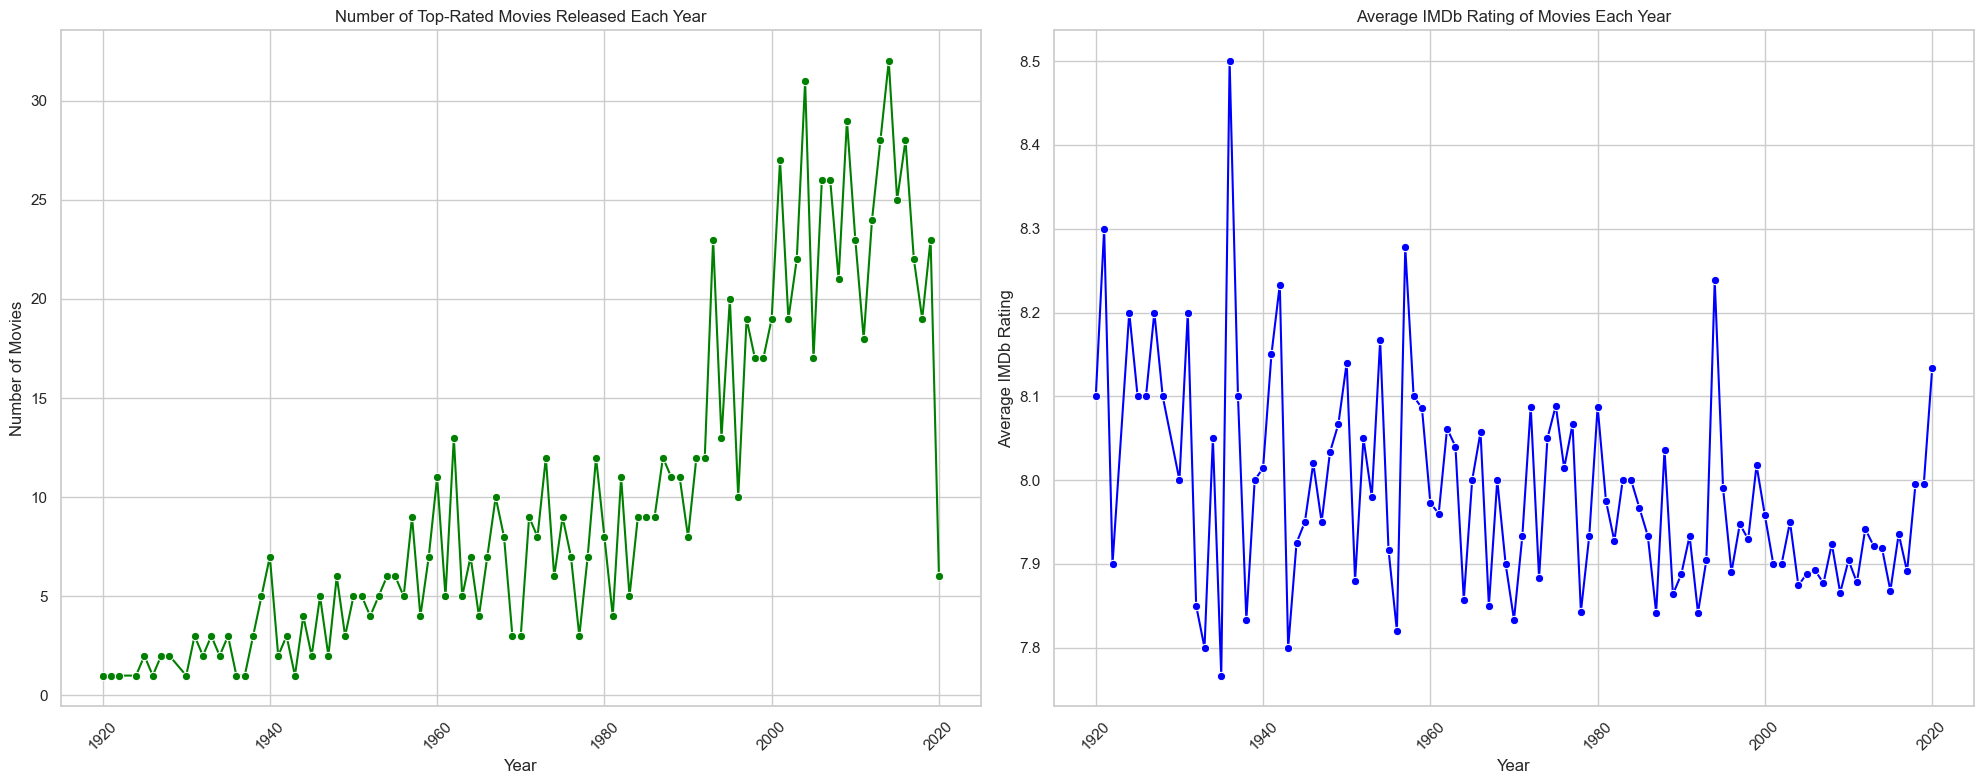

In [262]:
# Group by release year and calculate the number of movies and average rating for each year
yearly_data = movies_data.groupby('Released_Year').agg(
    Number_of_Movies=('IMDB_Rating', 'size'),
    Average_Rating=('IMDB_Rating', 'mean')
).reset_index()

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharex=True)

# Plot Number of Movies Released Each Year
sns.lineplot(ax=axes[0], x='Released_Year', y='Number_of_Movies', data=yearly_data, marker='o', color='green')
axes[0].set_title('Number of Top-Rated Movies Released Each Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Movies')

# Plot Average IMDb Rating of Movies Each Year
sns.lineplot(ax=axes[1], x='Released_Year', y='Average_Rating', data=yearly_data, marker='o', color='blue')
axes[1].set_title('Average IMDb Rating of Movies Each Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Average IMDb Rating')

# Rotate x-axis labels for better readability
for ax in axes:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Adjust layout for better fit and to prevent label overlap
plt.tight_layout()

# Display the plots
plt.show()

## Movie genres releases over the years
This section reveals movie genres released over the years.

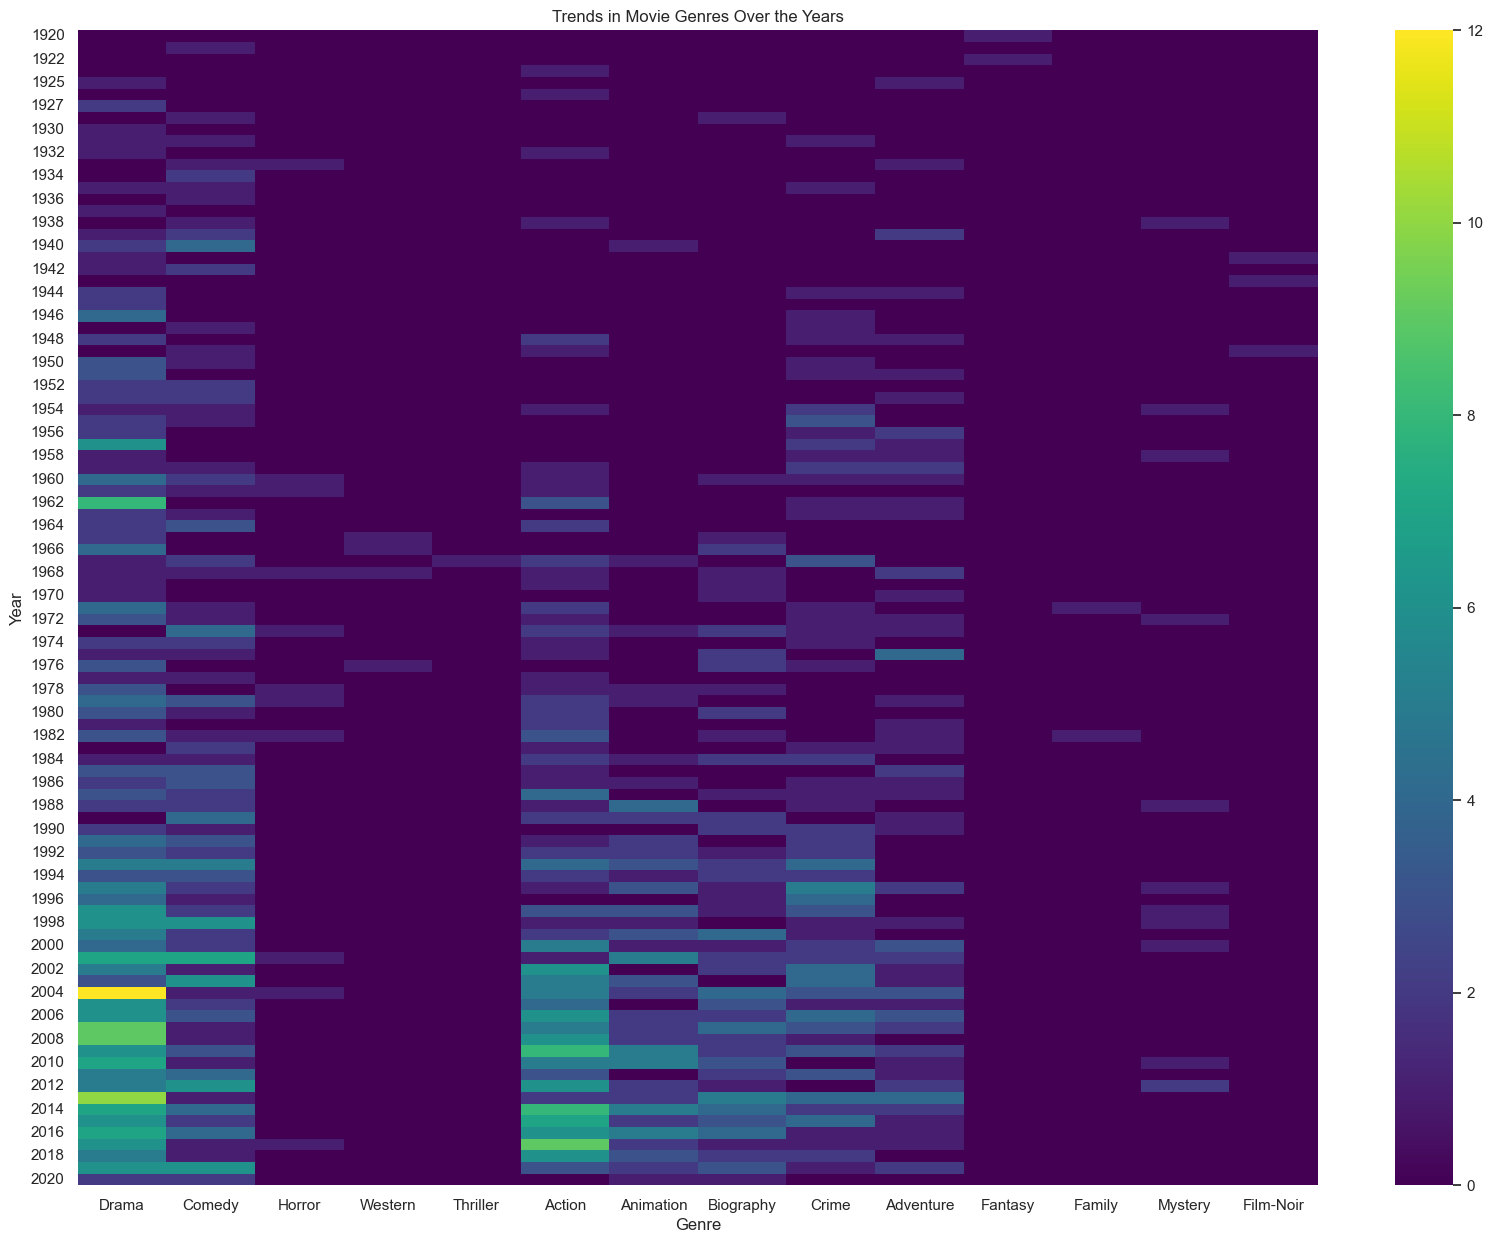

In [263]:
# Prepare the data for heatmap
# Initialize a dataframe to hold the year-genre counts
genre_year_counts = pd.DataFrame(index=np.sort(movies_data['Released_Year'].unique()), columns=genre_counts.keys())

# Fill the dataframe with zeros
genre_year_counts.fillna(0, inplace=True)

# For each movie, increment the count of its genres for its release year
for i, row in movies_data.iterrows():
    genres = row['Genre1'].split(', ')
    year = row['Released_Year']
    for genre in genres:
        if genre in genre_year_counts.columns:
            genre_year_counts.at[year, genre] += 1

# Now that we have the counts, we can create the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(genre_year_counts, cmap='viridis')
plt.title('Trends in Movie Genres Over the Years')
plt.ylabel('Year')
plt.xlabel('Genre')

# Show the heatmap
plt.show()


## Rating vs. Popularity
In this section, we will explore the relationship between the popularity and ratings of movies. 

The popularity of movies is measured either by the number of votes on IMDB or the gross income from the box office in the US.

 Ratings are coming from IMDB, where any registered user may cast a vote, or the Meta critic website, which takes into account verified critic judgements.

In [264]:
df_imdb=pd.io.gbq.read_gbq('''
SELECT 
  IMDB_Rating, 
  AVG(No_of_Votes)/1000000 AS No_of_Votes,
  AVG(Gross)/1000000 AS Gross 
FROM projekt-zaliczeniowy-401114.movies.movies
GROUP BY IMDB_Rating
ORDER BY IMDB_Rating
''',project_id='projekt-zaliczeniowy-401114').set_index('IMDB_Rating')
df_imdb.loc[9.1]=(np.nan,np.nan) # Adding the missing value (surprisingly none of the movies were rated 9.1)
df_imdb=df_imdb.sort_index()

df_meta=pd.io.gbq.read_gbq('''
SELECT 
  CASE
    WHEN Meta_score > 20 AND Meta_score <=30 THEN '(20,30]'
    WHEN Meta_score > 30 AND Meta_score <=40 THEN '(30,40]'
    WHEN Meta_score > 40 AND Meta_score <=50 THEN '(40,50]'
    WHEN Meta_score > 50 AND Meta_score <=60 THEN '(50,60]'
    WHEN Meta_score > 60 AND Meta_score <=70 THEN '(60,70]'
    WHEN Meta_score > 70 AND Meta_score <=80 THEN '(70,80]'
    WHEN Meta_score > 80 AND Meta_score <=90 THEN '(80,100]'
    WHEN Meta_score > 90 AND Meta_score <=100 THEN '(90,100]'
  END AS Meta_score,
  AVG(No_of_Votes)/1000000 AS No_of_Votes, 
  AVG(Gross)/1000000 AS Gross 
FROM projekt-zaliczeniowy-401114.movies.movies
WHERE Meta_score IS NOT NULL
GROUP BY Meta_score
ORDER BY Meta_score
''',project_id='projekt-zaliczeniowy-401114').set_index('Meta_score')

In [265]:
df_imdb

,No_of_Votes,Gross
IMDB_Rating,,
7.6,0.202460,70.104548
7.7,0.189061,58.849938
7.8,0.182244,75.684710
7.9,0.194705,52.405020
8.0,0.233544,71.311991
8.1,0.246973,52.492029
8.2,0.285052,45.537861
8.3,0.437450,47.587746
8.4,0.475780,133.760928


In [266]:
df_meta

,No_of_Votes,Gross
Meta_score,,
"(20,30]",0.297171,49.125273
"(30,40]",0.139165,23.694137
"(40,50]",0.189687,43.098947
"(50,60]",0.318828,71.461065
"(60,70]",0.372879,86.562444
"(70,80]",0.308727,80.659922
"(80,100]",0.308693,76.057839
"(90,100]",0.284358,54.966232


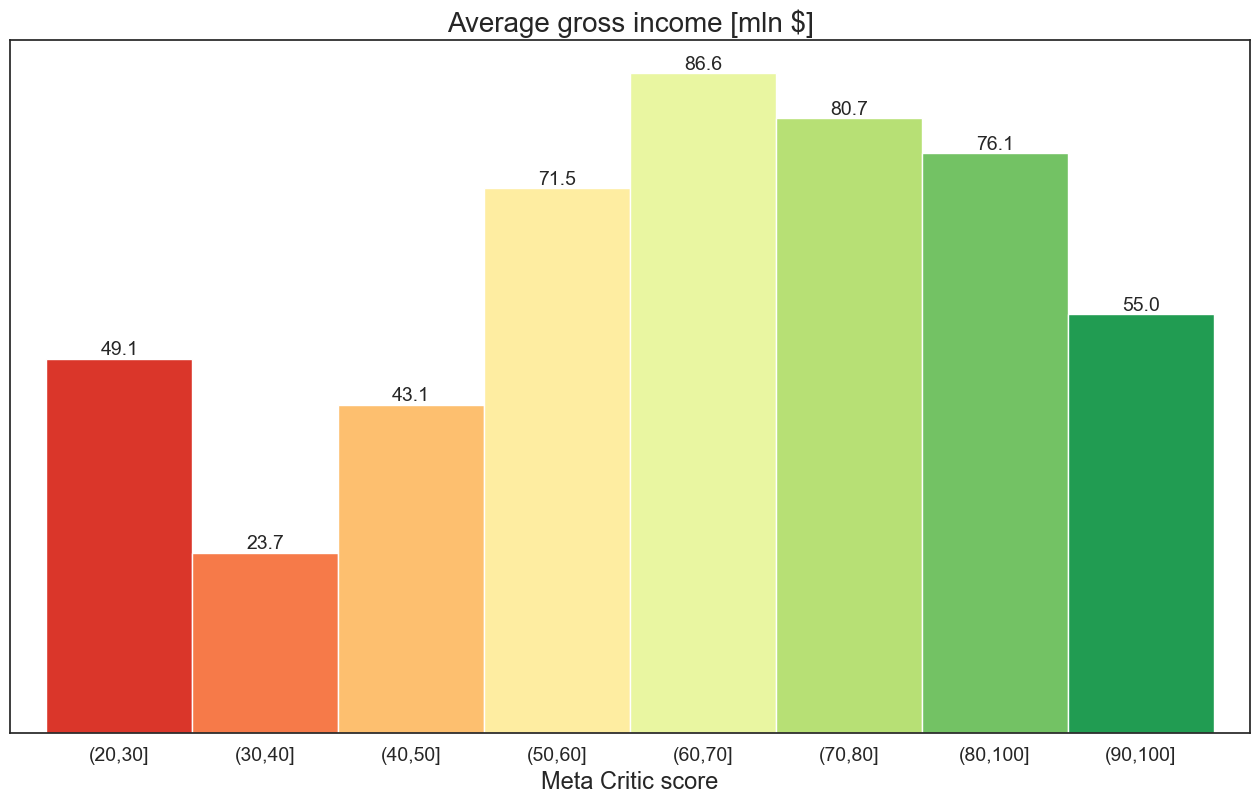

In [267]:
sns.set(style='white')
fig,ax=plt.subplots(figsize=(16,9))
df_meta['Gross'].plot.bar(width=1,color=sns.color_palette("RdYlGn",8),ax=ax)
ax.set_title('Average gross income [mln $]',fontsize=20)
ax.set_xlabel('Meta Critic score',fontsize=17)
ax.set_xticklabels(df_meta.index,rotation=0,fontsize=14)
ax.set_ylabel(None)
ax.set_yticks([])
ax.bar_label(ax.containers[0],fmt='%.1f',fontsize=14)
plt.show()

It seems that movies with Meta scores ranging from 60 to 70 are earning the most money at the box office. Surprisingly the "best" and the "worst" movies are at the same level of popularity, in terms of box office earnings.

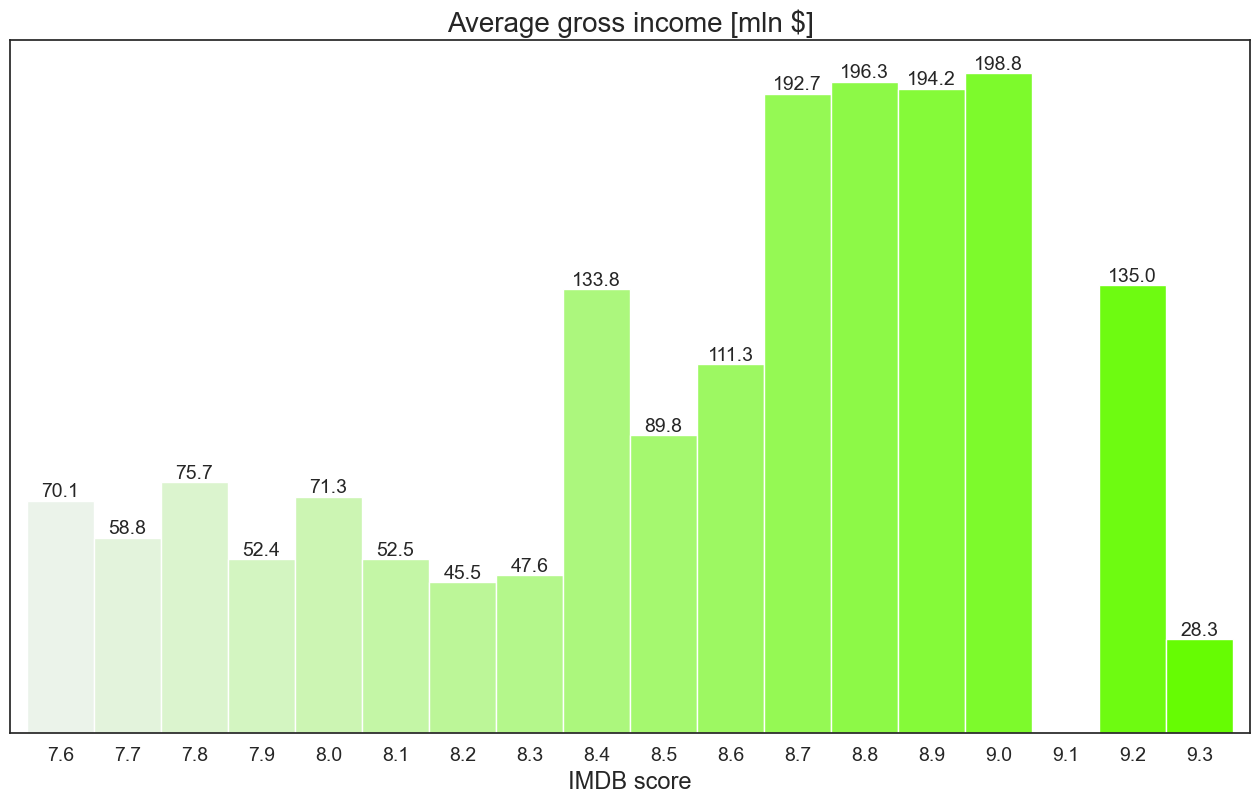

In [268]:
sns.set(style='white')
fig,ax=plt.subplots(figsize=(16,9))
df_imdb['Gross'].plot.bar(width=1,color=sns.light_palette(('#66fc03'),len(df_imdb)),ax=ax)
ax.set_title('Average gross income [mln $]',fontsize=20)
ax.containers[0].datavalues[-3]=np.nan # Removing the bar label of the missing value
ax.set_xlabel('IMDB score',fontsize=17)
ax.set_xticklabels(df_imdb.index,rotation=0,fontsize=14)
ax.set_ylabel(None)
ax.set_yticks([])
ax.bar_label(ax.containers[0],fmt='%.1f',fontsize=14)
plt.show()

When it comes to IMDB, the most popular movies are rated above average. Movies with lower scores are earning a lot less.

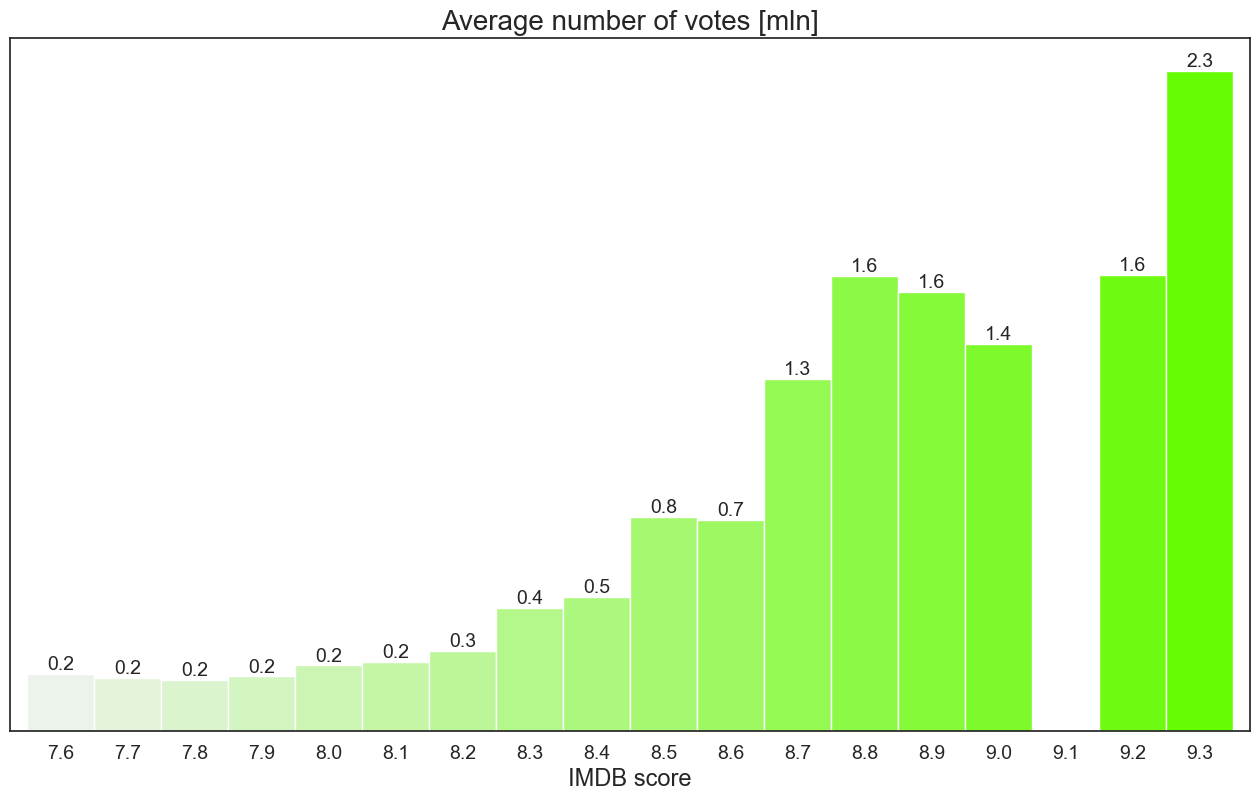

In [269]:
sns.set(style='white')
fig,ax=plt.subplots(figsize=(16,9))
df_imdb['No_of_Votes'].plot.bar(width=1,color=sns.light_palette(('#66fc03'),len(df_imdb)),ax=ax)
ax.set_title('Average number of votes [mln]',fontsize=20)
ax.containers[0].datavalues[-3]=np.nan # Removing the bar label of the missing value
ax.set_xlabel('IMDB score',fontsize=17)
ax.set_xticklabels(df_imdb.index,rotation=0,fontsize=14)
ax.set_ylabel(None)
ax.set_yticks([])
ax.bar_label(ax.containers[0],fmt='%.1f',fontsize=14)
plt.show()

The top rated movies on IMDB are also the most popular amongst the users of this website. The chart suggests that the "best" movies are universally loved by everyone. 

## IMDB score vs. Meta score
Are ratings from these websites correlated in any way?

In [270]:
df_scores=pd.io.gbq.read_gbq('''
SELECT 
    IMDB_Rating,
    Meta_score 
FROM projekt-zaliczeniowy-401114.movies.movies
WHERE Meta_score IS NOT NULL
''',project_id='projekt-zaliczeniowy-401114')
print(f"The Spearman correlation between the IMDB ratings and Meta scores is: {np.round(df_scores.corr(method='spearman')['IMDB_Rating']['Meta_score'],2)}")

The Spearman correlation between the IMDB ratings and Meta scores is: 0.28


The correlation is rather significant. However the value is pretty low, which suggests that critics tend to "disagree" with the larger audience. Let's visualize the relationship between those scores.

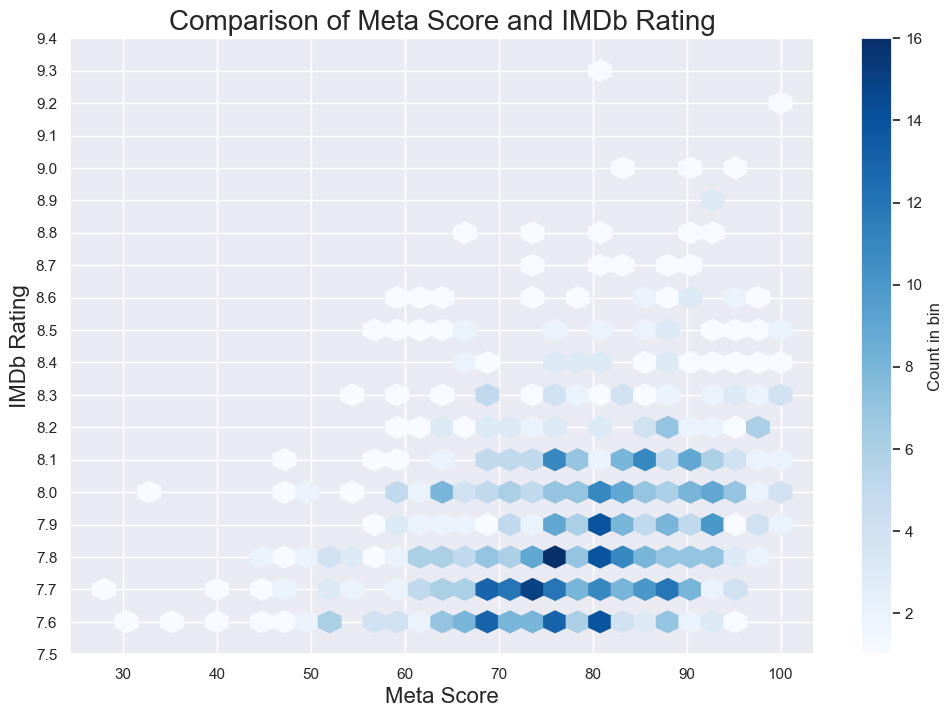

In [271]:
# Let's try a hexbin plot for a different style which may show the density of points better
plt.figure(figsize=(12, 8))
sns.set_style("darkgrid")

# Using hexbin plot to show density
plt.hexbin(movies_data['Meta_score'], movies_data['IMDB_Rating'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Count in bin')

# Plot enhancements
plt.title('Comparison of Meta Score and IMDb Rating', fontsize=20)
ticks=list(np.arange(7.5,9.4,0.1))
plt.yticks(ticks)
plt.xlabel('Meta Score', fontsize=16)
plt.ylabel('IMDb Rating', fontsize=16)

# Display the plot
plt.show()  

## Genres vs. Popularity
In this section we will take a look at the main movie genres making up the top 1000 according to IMDB.

In [272]:
df_genre=pd.io.gbq.read_gbq('''  
SELECT 
    IF(count>=50, genre, 'Other') AS Genre,
    SUM(count) AS Count,
    ROUND(SUM(imdb_sum)/SUM(count),2) AS Mean_IMDB_Rating,
    ROUND(SUM(gross_mln_sum)/SUM(count),2) AS Mean_Gross_mln,
    ROUND(SUM(votes_mln_sum)/SUM(count),2) AS Mean_Votes_mln
FROM
    (
    SELECT 
        DISTINCT Genre1 AS genre, 
        COUNT(*) AS count,
        SUM(IMDB_Rating) AS imdb_sum,
        SUM(Gross)/1000000 as gross_mln_sum,
        SUM(No_Of_Votes)/1000000 as votes_mln_sum
    FROM projekt-zaliczeniowy-401114.movies.movies
    GROUP BY genre
    )
GROUP BY genre
ORDER BY Count
''',project_id='projekt-zaliczeniowy-401114').set_index('Genre')
df_genre

,Count,Mean_IMDB_Rating,Mean_Gross_mln,Mean_Votes_mln
Genre,,,,
Other,35,7.98,43.64,0.30
Adventure,72,7.94,73.25,0.31
Animation,82,7.93,104.56,0.27
Biography,88,7.94,53.98,0.27
Crime,107,8.02,29.72,0.31
Comedy,155,7.90,26.87,0.18
Action,172,7.95,116.38,0.42
Drama,289,7.96,31.32,0.21


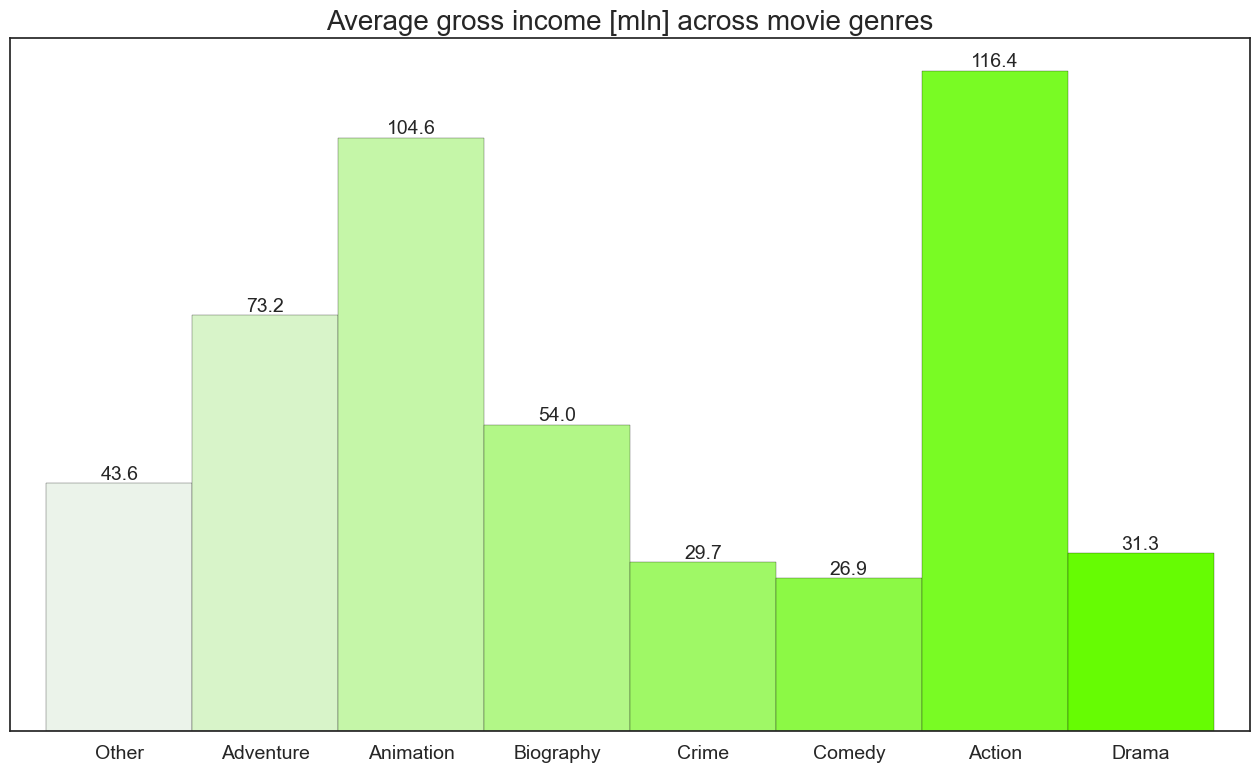

In [273]:
sns.set(style='white')
fig,ax=plt.subplots(figsize=(16,9))
df_genre['Mean_Gross_mln'].plot.bar(width=1,
                                    color=sns.light_palette(('#66fc03'),len(df_genre)),
                                    edgecolor='black',
                                    linewidth=0.2,
                                    ax=ax)
ax.set_title('Average gross income [mln] across movie genres',fontsize=20)
ax.set_xlabel(None)
ax.set_xticklabels(df_genre.index,rotation=0,fontsize=14)
ax.set_ylabel(None)
ax.set_yticks([])
ax.bar_label(ax.containers[0],fmt='%.1f',fontsize=14)
plt.show()

Unsurprisingly, action and animated movies are the best earners.

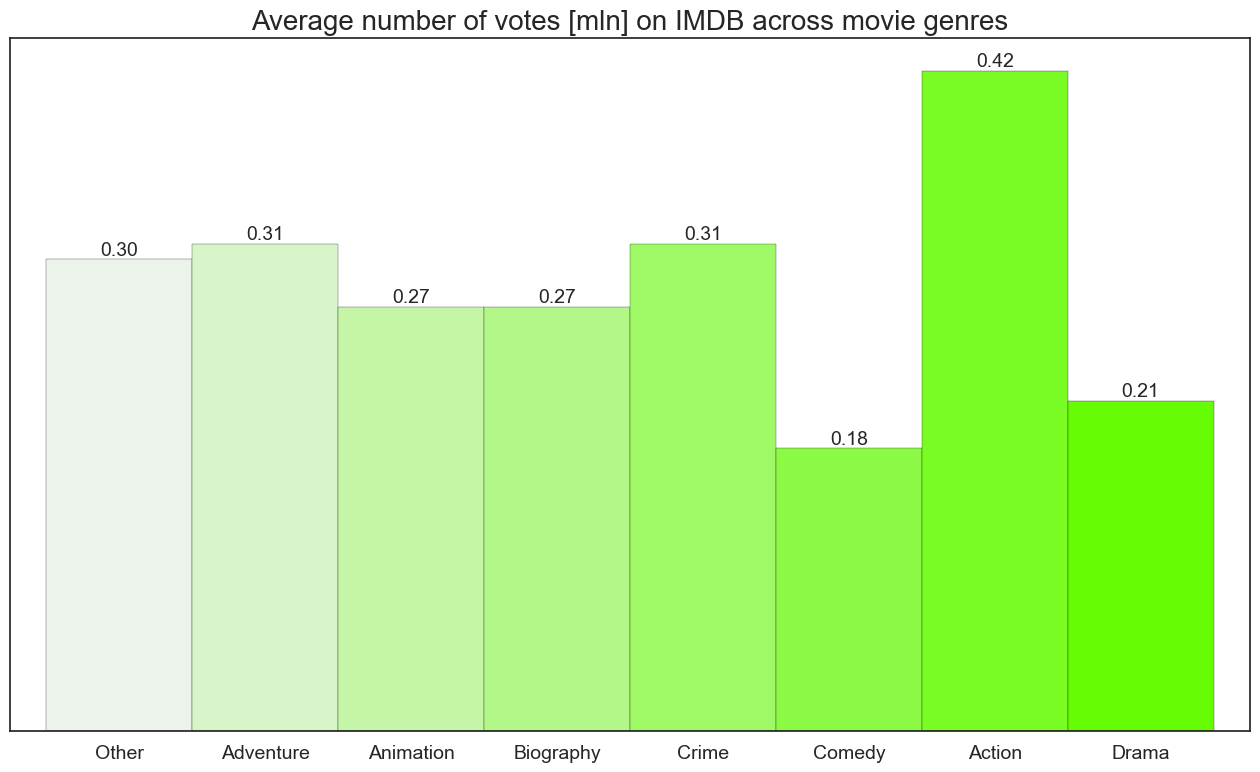

In [274]:
sns.set(style='white')
fig,ax=plt.subplots(figsize=(16,9))
df_genre['Mean_Votes_mln'].plot.bar(width=1,
                                    color=sns.light_palette(('#66fc03'),len(df_genre)),
                                    edgecolor='black',
                                    linewidth=0.2,
                                    ax=ax)
ax.set_title('Average number of votes [mln] on IMDB across movie genres',fontsize=20)
ax.set_xlabel(None)
ax.set_xticklabels(df_genre.index,rotation=0,fontsize=14)
ax.set_ylabel(None)
ax.set_yticks([])
ax.bar_label(ax.containers[0],fmt='%.2f',fontsize=14)
plt.show()

Action movies are also the most popular among voting IMDB users.

## IMDB Rating vs. Gross box office income vs. Release year
This section is all about plotting 3 dimensions together with plotly. Here we can see all the movies from the list in regards to these 3 parameters.

In [275]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2',
       'Star3', 'Star4', 'No_of_Votes', 'Gross', 'Runtime_minutes', 'Genre1',
       'Genre2', 'Genre3'],
      dtype='object')

In [276]:
#font = {'size': 8}
#plt.rc('font', **font)
pyt3 = df.loc[:,["Series_Title","No_of_Votes","IMDB_Rating", "Gross", "Released_Year"]]
pyt3.columns=["Title","Number of votes","IMDB Rating", "Gross", "Released Year"]
x = pyt3["IMDB Rating"]
y = pyt3["Gross"]
z = pyt3["Released Year"]

fig = plt.figure()
three_d_plot = Axes3D(fig)
three_d_plot.scatter(x, y, z)
three_d_plot.set_title('IMDB rating - groos income - year of release')
three_d_plot.set_xlabel('IMDB Rating')
three_d_plot.set_ylabel('Gross income')
three_d_plot.set_zlabel('Year of release')
plt.show(block = True)

<Figure size 640x480 with 0 Axes>

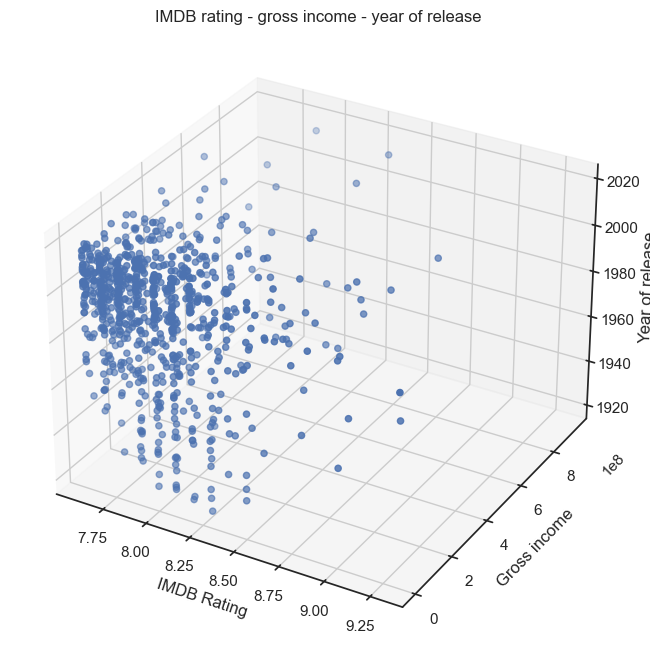

In [277]:
# Assuming pyt3 is a pandas DataFrame
x = pyt3["IMDB Rating"]
y = pyt3["Gross"]
z = pyt3["Released Year"]

fig = plt.figure(figsize=(8,8))
three_d_plot = fig.add_subplot(111, projection='3d')
three_d_plot.scatter(x, y, z)

three_d_plot.set_title('IMDB rating - gross income - year of release')
three_d_plot.set_xlabel('IMDB Rating')
three_d_plot.set_ylabel('Gross income')
three_d_plot.set_zlabel('Year of release')

# Show the plot
plt.show()

In [278]:
pyt3['Number of votes'] = (np.round(pyt3['Number of votes']/1000000,2)*1000000).astype(float)
pyt3['Gross'] = np.round(pyt3['Gross']/1000000,2)*1000000
fig = px.scatter_3d(pyt3, x = pyt3["IMDB Rating"], y = pyt3["Gross"], z = pyt3["Released Year"])
fig = px.scatter_3d(pyt3, x = "IMDB Rating", y ="Gross", z = "Released Year", size = "Number of votes", hover_name="Title")
fig.show()

## Outlier analysis
Outlier analysis is the process of identifying outliers, or abnormal observations, in a dataset. Also known as outlier detection, it’s an important step in data analysis, as it removes erroneous or inaccurate observations which might otherwise skew conclusions and bias the results. In our case we will use IQR rule to detect the outliers.

IQR is the range between the first and the third quartiles namely Q1 and Q3: IQR = Q3 – Q1. The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.

In [279]:
def outliers_detection(dataframe):
    """ A function that return tuple with dictionary that contains number of outliers for every column and
        a data frame with the value True/False if the observation is an outlier"""
    dframe = dataframe.copy()
    dict_of_outliers = dict()
    df_dict = dict()
    for col in dataframe.columns:
        if dframe[col].dtype != "object":
            dframe[col].fillna(dframe[col].mean(), inplace = True)
            inter_quartile = iqr(dframe[col])
            lower_boundary = np.quantile(dframe[col], 0.25) - (1.5 * inter_quartile)
            upper_boundary = np.quantile(dframe[col], 0.75) + (1.5 * inter_quartile)
            num_outliers = dframe[col].where((dframe[col] < lower_boundary) | (dframe[col] > upper_boundary)).count()
            dict_of_outliers[col] = num_outliers
            df_dict[col] = ~dframe[col].where((dframe[col] < lower_boundary) | (dframe[col] > upper_boundary)).isna()
    return dict_of_outliers, pd.DataFrame(df_dict)

In this report we will focus on IMDB_Rating and Meta_score outliers. It is important to detect observations which have significantly different ratings. Let's then find observations which are outliers in IMDB_Rating or Meta_score rating.

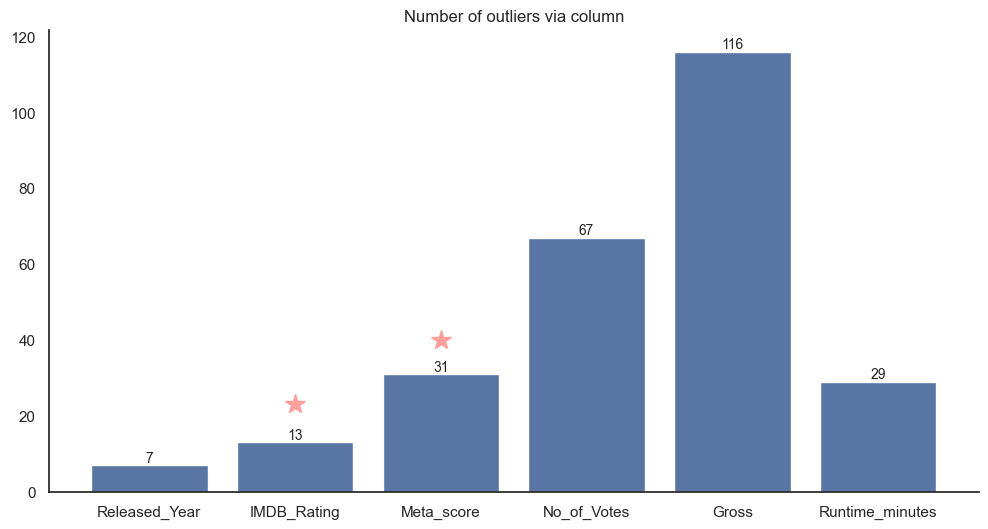

In [280]:
# Execute the function on our initial data frame  
outliers = outliers_detection(df)[0]
# Visualization of the number of outliers
fig, ax = plt.subplots(figsize = (12,6))
sns.set(style = "whitegrid", palette = "pastel", color_codes = True)
sns.despine(top = True, right = True)
sns.barplot(outliers, ax = ax)
ax.set_title("Number of outliers via column")
ax.bar_label(ax.containers[0], fontsize=10)
ax.plot("Meta_score", 40, "*", markersize = 15, color = "r")
ax.plot("IMDB_Rating", 23, "*", markersize=15, color="r")
plt.show()

In [281]:
is_outlier = outliers_detection(df)[1]
outliers_idx = is_outlier.query('(IMDB_Rating == True) | (Meta_score == True)').index
imdb_or_meta_outliers = df.iloc[outliers_idx]
print(f"There are {len(imdb_or_meta_outliers)} outliers!")
display(imdb_or_meta_outliers.head())

There are 44 outliers!


,Poster_Link,Series_Title,Released_Year,Certificate,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Runtime_minutes,Genre1,Genre2,Genre3
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,142,Drama,None,None
1,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Fight Club,1999,A,8.8,An insomniac office worker and a devil-may-car...,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,37030102.0,139,Drama,None,None
31,https://m.media-amazon.com/images/M/MV5BMTUyMT...,My Name Is Khan,2010,UA,8.0,An Indian Muslim man with Asperger's syndrome ...,50.0,Karan Johar,Shah Rukh Khan,Kajol,Sheetal Menon,Katie A. Keane,98575,4018695.0,165,Drama,None,None
63,https://m.media-amazon.com/images/M/MV5BMTM3Nz...,Detachment,2011,None,7.7,A substitute teacher who drifts from classroom...,52.0,Tony Kaye,Adrien Brody,Christina Hendricks,Marcia Gay Harden,Lucy Liu,77071,71177.0,98,Drama,None,None
67,https://m.media-amazon.com/images/M/MV5BYzEyNz...,I Am Sam,2001,PG-13,7.7,A mentally handicapped man fights for custody ...,28.0,Jessie Nelson,Sean Penn,Michelle Pfeiffer,Dakota Fanning,Dianne Wiest,142863,40311852.0,132,Drama,None,None


We will visualize the outliers among all observations on a IMDB_rating - Meta_score scatter plot.

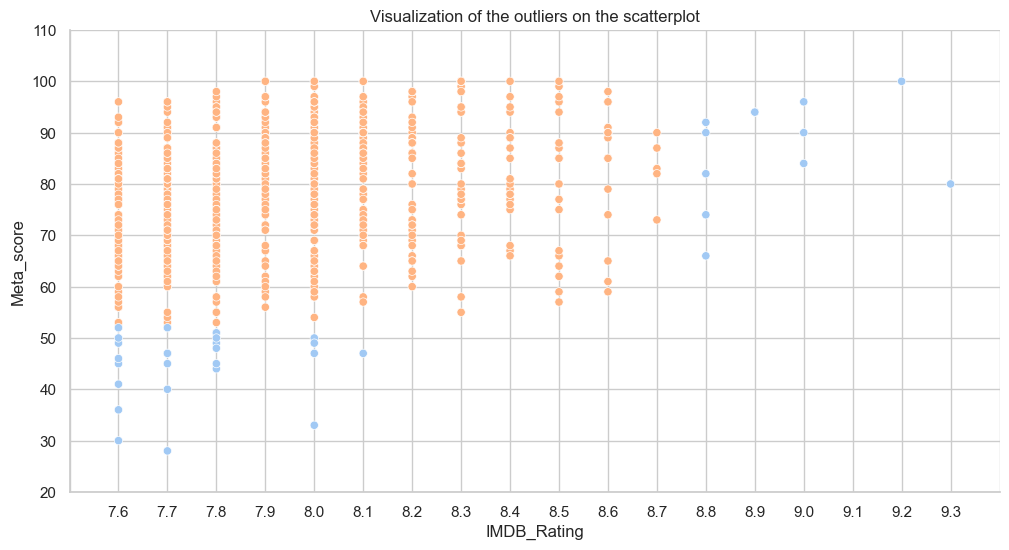

In [282]:
# Creating a list of colors for the plot
colors = list()
for idx in list(df.index):
    if idx not in outliers_idx:
        colors.append("black")
    else:
        colors.append("red")
# Visualization
sns.set(style = "whitegrid", palette = "pastel", color_codes = True)
fig, ax = plt.subplots(figsize = (12,6))
sns.despine(top = True, right = True)
sns.scatterplot(data = df, x = "IMDB_Rating", y = "Meta_score", hue = colors, ax = ax, legend = False)
ax.set_title("Visualization of the outliers on the scatterplot")
ax.set_xlim(left=7.5,right=9.4)
ticks=list(np.round(np.arange(7.5,9.5,0.1),1))
ax.set_xticks(ticks)
ax.set_xticklabels([None]+ticks[1:-1]+[None])
ax.set_ylim(top=110,bottom=20)
plt.show()

Below we mention descriptive statistics of the IMDB_rating and Meta_rating outliers. We can see that mean runtime of the films which are taken as outliers is around 132 minutes. When we move onto the ratings we can see that minimum Meta_score rating is 28.0 (maximum 100.0), whereas for IMDB_Rating minimum is 7.6 (maximum 9.3). We can also observe that the films were released in years between 1957 and 2019, whereas at least 50% of them were released in 2001 year or before.

In [283]:
imdb_or_meta_outliers.describe().T

,count,mean,std,min,25%,50%,75%,max
Released_Year,44.0,1998.227273,13.521496,1957.0,1994.0,2001.0,2007.25,2019.0
IMDB_Rating,44.0,8.095455,0.572207,7.6,7.675,7.8,8.8,9.3
Meta_score,44.0,58.340909,20.451807,28.0,46.75,50.5,75.5,100.0
No_of_Votes,44.0,627269.568182,714805.108911,28825.0,105943.0,273261.5,832145.0,2343110.0
Gross,43.0,86093953.581395,120873472.27961,1305.0,3907697.0,52990775.0,102413790.0,534858444.0
Runtime_minutes,44.0,132.204545,30.462008,90.0,111.75,130.0,147.25,202.0


In [284]:
# Execute the function on outliers dataset
count_obs(imdb_or_meta_outliers, "Genre1", "Genre2", "Genre3")

Drama        34
None         24
Crime        16
Action       13
Adventure     7
dtype: int64

The outliers are mostly drama type (34 out of 44 observations). Second type of genre that appears most frequently is Crime (16 out of 44 observations).

## Clustering 
The next step to gather insights from the data will be clustering algorithm using KMeans.  
For the clustering we will use only numeric columns from the initial data set:
- Released_Year
- IMDB_Rating
- Meta_score
- No_of_Votes
- Gross
- Runtime_minutes  
  
Before the clustering it is important to deal with outliers and NAs

In [287]:
# Define the data set with conaining numeric columns from initial data set
df_numeric = df[["Released_Year", "IMDB_Rating", "Meta_score", "No_of_Votes", "Gross", "Runtime_minutes"]]
print(f"Number of missing values before: {df_numeric.isna().sum().sum()}")
#-------------------------------------
# We will input the NA with mean value
#-------------------------------------
# Define the function
def na_mean_inputation(dataframe):
    """Input NA values in every column with the mean"""
    for col in dataframe.columns:
        dataframe.loc[:,col]=dataframe[col].fillna(dataframe[col].mean())
    return dataframe
# Execute the function
df_numeric=na_mean_inputation(df_numeric)
print(f"Number of missing values after: {df_numeric.isna().sum().sum()}")

Number of missing values before: 326
Number of missing values after: 0


In [288]:
# Data set without NAs and outliers
df_clean = df_numeric[~is_outlier.T.any()]
# Number of outliers
print(f"We observed that there are {len(df_numeric) - len(df_clean)} observations that have outlier in one of the variables.\nWe will drop all of those observations. Now we will work with {len(df) - (len(df_numeric) - len(df_clean))} observations left.")

We observed that there are 207 observations that have outlier in one of the variables.
We will drop all of those observations. Now we will work with 793 observations left.


Next step before clustering is standardization of the data. The data must be standardized because variance of the variable influences power of the variable in clustering. To provide that every variable will have the same influence on the clustering, we have to standardize the data.

In [289]:
scaler = StandardScaler()
df_clean_standardized = scaler.fit_transform(df_clean)

In [290]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 793 entries, 3 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Released_Year    793 non-null    Int64  
 1   IMDB_Rating      793 non-null    float64
 2   Meta_score       793 non-null    float64
 3   No_of_Votes      793 non-null    Int64  
 4   Gross            793 non-null    float64
 5   Runtime_minutes  793 non-null    Int64  
dtypes: Int64(3), float64(3)
memory usage: 45.7 KB


Before the clustering there is also necessary to check whether our variables are not highly correlated. To check that we will plot a heatmap. The information behind the plot is important for further analysis as correlation of the variables cause bias. Since there are no variables that are highly correlated and we have only few variables - there will not be necessary to use dimension reduction techniques.

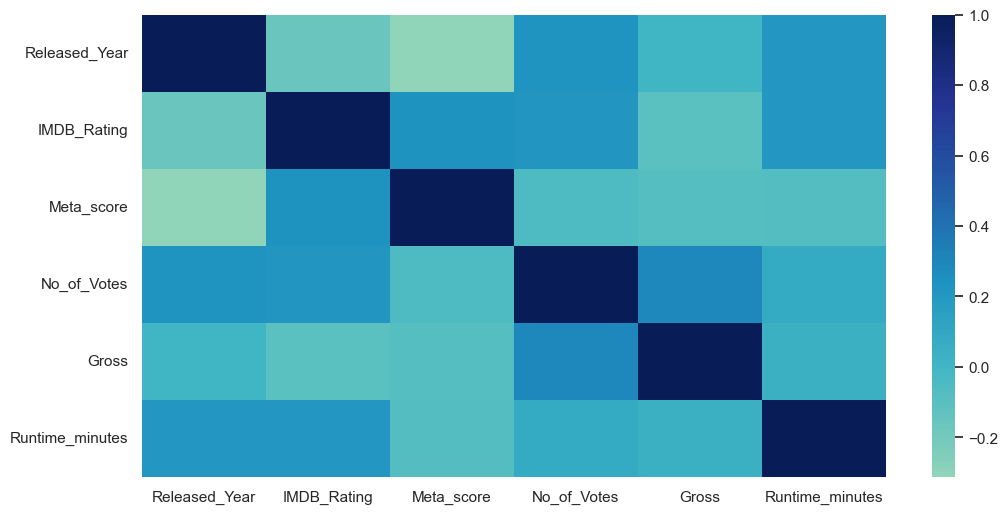

In [291]:
# We plot a heatmap of pearson correlation
plt.figure(figsize = (12,6))
sns.heatmap(df_clean.corr(), center = 0, cmap = "YlGnBu")
plt.show()

## KMeans optimal number of clusters specification
In KMeans clustering technique we have to specify number of clusters apriori. In this report we will base on cluster inertia to find optimal number of clusters. The lower inertia the better. As a first step we plot inertia for different number of clusters (1-9). Then based on "elbow" method we choose optimal number of clusters.

In [292]:
df_clean_standardized

array([[ 1.28833382,  2.91752077, -0.11184815, -0.68392996,  0.82401982,
         1.44238156],
       [ 1.20372523,  2.06079277, -0.41358666, -0.64191451, -0.97962772,
         0.28428985],
       [ 0.94989946,  1.63242877, -0.21050038,  0.56238915, -1.00609292,
        -0.18752529],
       ...,
       [-1.84218399, -0.08102724,  2.12499182, -0.47874167, -0.7404163 ,
        -0.745125  ],
       [-1.88448829, -0.08102724, -0.11184815, -0.8018702 , -0.76769915,
        -0.78801728],
       [-1.84218399, -0.93775524, -0.11184815, -0.83243589,  0.82401982,
        -0.40198672]])

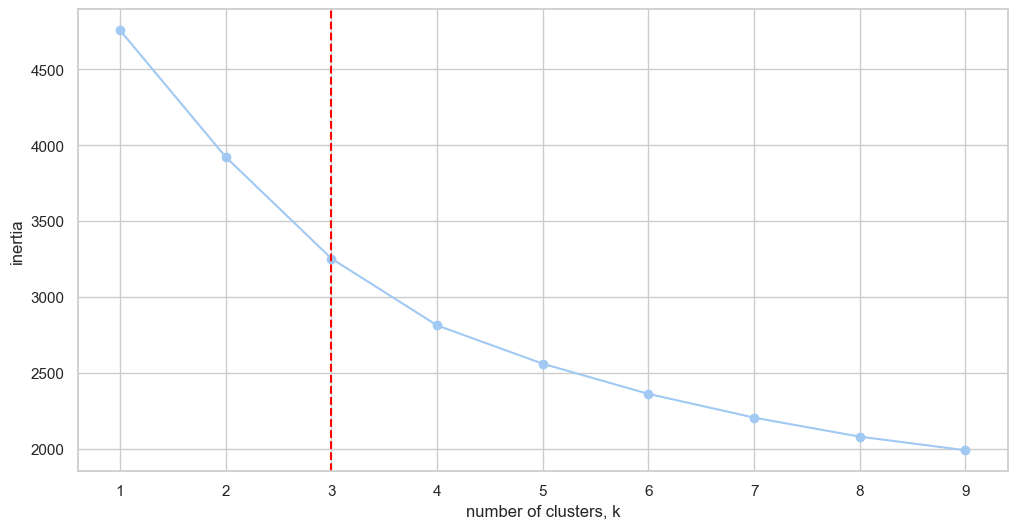

In [293]:
ks = range(1, 10)
inertias = list()
for k in ks:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df_clean_standardized)
    inertias.append(kmeans.inertia_)
# Plot of inertia for different number of clusters
plt.figure(figsize=(12,6))
plt.plot(ks, inertias, "-o")
plt.axvline(x = 3, linestyle = "--", color = "red")
plt.xlabel("number of clusters, k")
plt.ylabel("inertia")
plt.xticks(ks)
plt.show()

## t-SNE
We may also use t-SNE dimension reduction method to "glimpse" at the data before choosing optimal number of clusters. Specifically, it models each high-dimensional object by a two dimensional point in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points with high probability. If we choose a point and there are some points in the proximity of the point, the points are similar to each other in the input space (high dimensional space).

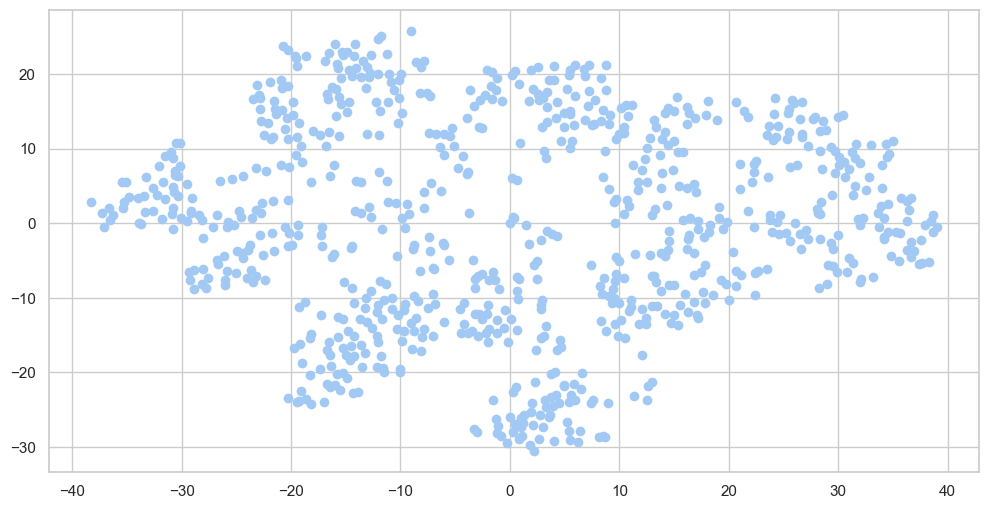

In [294]:
visual_model = TSNE(learning_rate=50)
transformed = visual_model.fit_transform(df_clean_standardized)
xs = transformed[:, 0]
ys = transformed[:, 1]
plt.figure(figsize= (12,6))
plt.scatter(xs, ys)
plt.show()

Based on the inertia and t-SNE it might be rational to go for 3 clusters as an optimal number.

In [295]:
kmeans3 = KMeans(n_clusters = 3)
kmeans3.fit(df_clean_standardized)
kmeans_model = kmeans3.transform(df_clean_standardized)
labels = kmeans3.predict(df_clean_standardized)

We can go back to t-SNE plot to see how the KMeans clustering performed. The glimpse on the data set in 2-dimensional plot using t-SNE gave us exact information how the clusters might be formed. Based on KMeans algorithm the aggregation of the points exactly matches to the obtained clusters, whereas small congries were grouped into one cluster

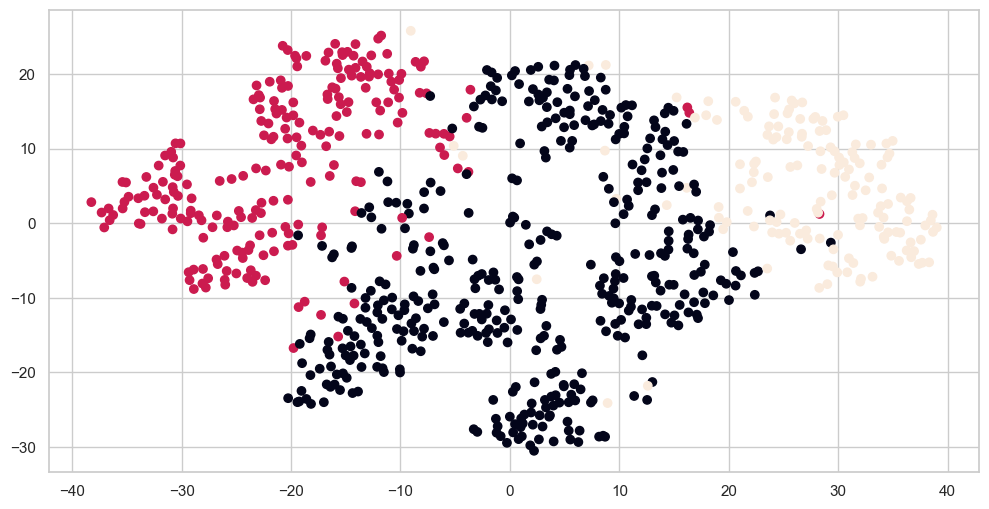

In [296]:
# t-SNE plot with assigned clusters obtained by KMeans
plt.figure(figsize=(12,6))
plt.scatter(xs,ys, c = labels)
plt.show()

## Clusters analysis
Firstly we have to assign the labels to initial dataset. For clustering we used numeric variables without outliers so we also have to exclude observations that are outliers from the initial dataset.

In [297]:
# Initial data set without outliers
df_no_outliers = df[~is_outlier.T.any()].copy()
# Assigning cluster number to the data set
df_no_outliers["cluster"] = labels

Descriptive statistics of numeric variables for the obtained clusters look like in data frame below. Due to KMeans clustering we obtained 3 clusters:
- first cluster - 417 observations
- second cluster - 225 observations
- third cluster - 151 observations

In [298]:
df_no_outliers.groupby(by = "cluster").describe().T

cluster                              0                1                2
Released_Year   count            421.0            224.0            148.0
                mean       2001.541568      1958.482143      2002.439189
                std          12.866949        14.880078        12.469951
                min             1960.0           1927.0           1967.0
                25%             1993.0           1948.0           1995.0
                50%             2004.0           1959.0           2005.5
                75%             2012.0           1969.0           2013.0
                max             2020.0           1994.0           2019.0
IMDB_Rating     count            421.0            224.0            148.0
                mean          7.858907         7.999554         7.967568
                std           0.211678         0.220171         0.264245
                min                7.6              7.6              7.6
                25%                7.7              7.8              7.7
                50%                7.8              8.0              8.0
                75%                8.0              8.1              8.1
                max                8.6              8.6              8.6
Meta_score      count            335.0            167.0            147.0
                mean         75.322388         89.08982        77.319728
                std           9.430042         7.368793         10.50048
                min               53.0             72.0             53.0
                25%               68.0             85.5             70.5
                50%               76.0             90.0             78.0
                75%               82.0             95.0             85.0
                max               97.0            100.0            100.0
No_of_Votes     count            421.0            224.0            148.0
                mean      111465.71734    105462.767857    484332.743243
                std       85564.350503     99950.291722    164724.554844
                min            25088.0          25312.0         141923.0
                25%            46739.0         40303.25         364378.5
                50%            77798.0          67490.0         466205.0
                75%           159886.0         135540.0         609159.5
                max           490062.0         604211.0         799795.0
Gross           count            348.0            136.0            147.0
                mean   16363979.221264  16947081.338235   74039402.85034
                std    21518552.018366  24154372.051645  43342214.733793
                min             3296.0          10177.0         707481.0
                25%         1415636.25        727533.75       36764076.0
                50%          5881231.5        7815000.0       70136369.0
                75%         23685577.0       23832494.5      107963538.0
                max        119285432.0      119500000.0      161197785.0
Runtime_minutes count            421.0            224.0            148.0
                mean        120.862233       112.526786       125.493243
                std          23.522735        22.678276        21.345393
                min               71.0             64.0             76.0
                25%              103.0             96.0           112.75
                50%              119.0            108.5            122.5
                75%              135.0           125.25           137.25
                max              188.0            188.0            183.0

## Most popular actors
Who is the most popular actor in the top 1000 movies?

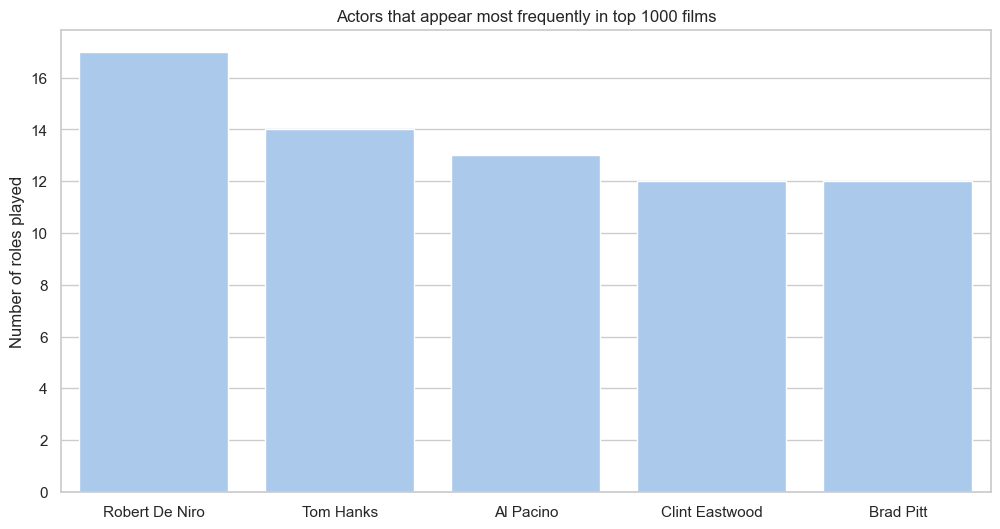

In [299]:
# Define the function
def count_obs(dataframe, *cols):
    """Function to calculate values that appear in columns of the dataframe"""
    dict_result = dict()
    for col in cols:
        for obs in dataframe[col]:
            if obs not in dict_result:
                dict_result[obs] = 1
            else:
                dict_result[obs] += 1
    return pd.Series(dict_result).sort_values(ascending = False).head()
# Execute the function on df dataframe
top5_actors = count_obs(df, "Star1", "Star2", "Star3", "Star4")
# Visualization
sns.set(style = "whitegrid", palette = "pastel", color_codes = True)
fig, ax = plt.subplots(figsize = (12,6))
sns.barplot(top5_actors, ax = ax)
ax.set_title("Actors that appear most frequently in top 1000 films")
ax.set_ylabel("Number of roles played")
plt.show()

## Director showcase
In this section we will identify a director who produced the highest amount of modern movies in the top 1000 list. Any movie released in the 1970 or later will be considered. Later, we will see how his works did in terms of ratings and box office income.

In [300]:
pd.io.gbq.read_gbq('''  
SELECT 
    DISTINCT Director,
    COUNT(*) as Count
FROM projekt-zaliczeniowy-401114.movies.movies
WHERE Released_Year>=1970
GROUP BY Director
HAVING Count>5
ORDER BY Count DESC
''',project_id='projekt-zaliczeniowy-401114').head(10)

,Director,Count
0,Steven Spielberg,13
1,Hayao Miyazaki,11
2,Martin Scorsese,10
3,Woody Allen,9
4,David Fincher,8
5,Clint Eastwood,8
6,Christopher Nolan,8
7,Quentin Tarantino,8
8,Rob Reiner,7
9,Richard Linklater,6


Steven spielberg tops the list of modern directors with a total of 13 works in the list.

In [301]:
df_spielberg=pd.io.gbq.read_gbq(''' 
SELECT 
    Series_Title,
    Released_Year,
    IMDB_Rating,
    Gross/1000000 as Gross_mln
FROM projekt-zaliczeniowy-401114.movies.movies
WHERE Director="Steven Spielberg"
ORDER BY Released_Year
''',project_id='projekt-zaliczeniowy-401114')
df_spielberg

,Series_Title,Released_Year,IMDB_Rating,Gross_mln
0,Jaws,1975,8.0,260.000000
1,Close Encounters of the Third Kind,1977,7.6,132.088635
2,Raiders of the Lost Ark,1981,8.4,248.159971
3,E.T. the Extra-Terrestrial,1982,7.8,435.110554
4,The Color Purple,1985,7.8,98.467863
5,Empire of the Sun,1987,7.7,22.238696
6,Indiana Jones and the Last Crusade,1989,8.2,197.171806
7,Schindler's List,1993,8.9,96.898818
8,Jurassic Park,1993,8.1,402.453882
9,Saving Private Ryan,1998,8.6,216.540909


In order to be able to compare earnings of Spielberg's movies, we need to adjust the gross income for inflation.

In [302]:
df_inflation=pd.read_csv('USA_Inflation.csv')
df_inflation.columns=['Year','CPI']
df_inflation['Year']=df_inflation['Year'].str[:4].astype(int)
df_inflation['CPI']=(df_inflation['CPI']/100)+1
df_inflation.tail(5)

,Year,CPI
43,2018,1.024426
44,2019,1.018122
45,2020,1.012336
46,2021,1.046979
47,2022,1.080028


In [303]:
def get_inflation(year):
    return df_inflation[(df_inflation['Year']>year)]['CPI'].prod()
df_spielberg['Gross_mln_adjusted']=0
for i in df_spielberg.index:
    df_spielberg.at[i,'Gross_mln_adjusted']=df_spielberg['Gross_mln'].iloc[i]*get_inflation(df_spielberg['Released_Year'].iloc[i])
df_spielberg

,Series_Title,Released_Year,IMDB_Rating,Gross_mln,Gross_mln_adjusted
0,Jaws,1975,8.0,260.000000,1413.879436
1,Close Encounters of the Third Kind,1977,7.6,132.088635,637.806492
2,Raiders of the Lost Ark,1981,8.4,248.159971,798.737813
3,E.T. the Extra-Terrestrial,1982,7.8,435.110554,1319.556921
4,The Color Purple,1985,7.8,98.467863,267.899946
5,Empire of the Sun,1987,7.7,22.238696,57.278449
6,Indiana Jones and the Last Crusade,1989,8.2,197.171806,465.474309
7,Schindler's List,1993,8.9,96.898818,196.305155
8,Jurassic Park,1993,8.1,402.453882,815.322346
9,Saving Private Ryan,1998,8.6,216.540909,388.763939


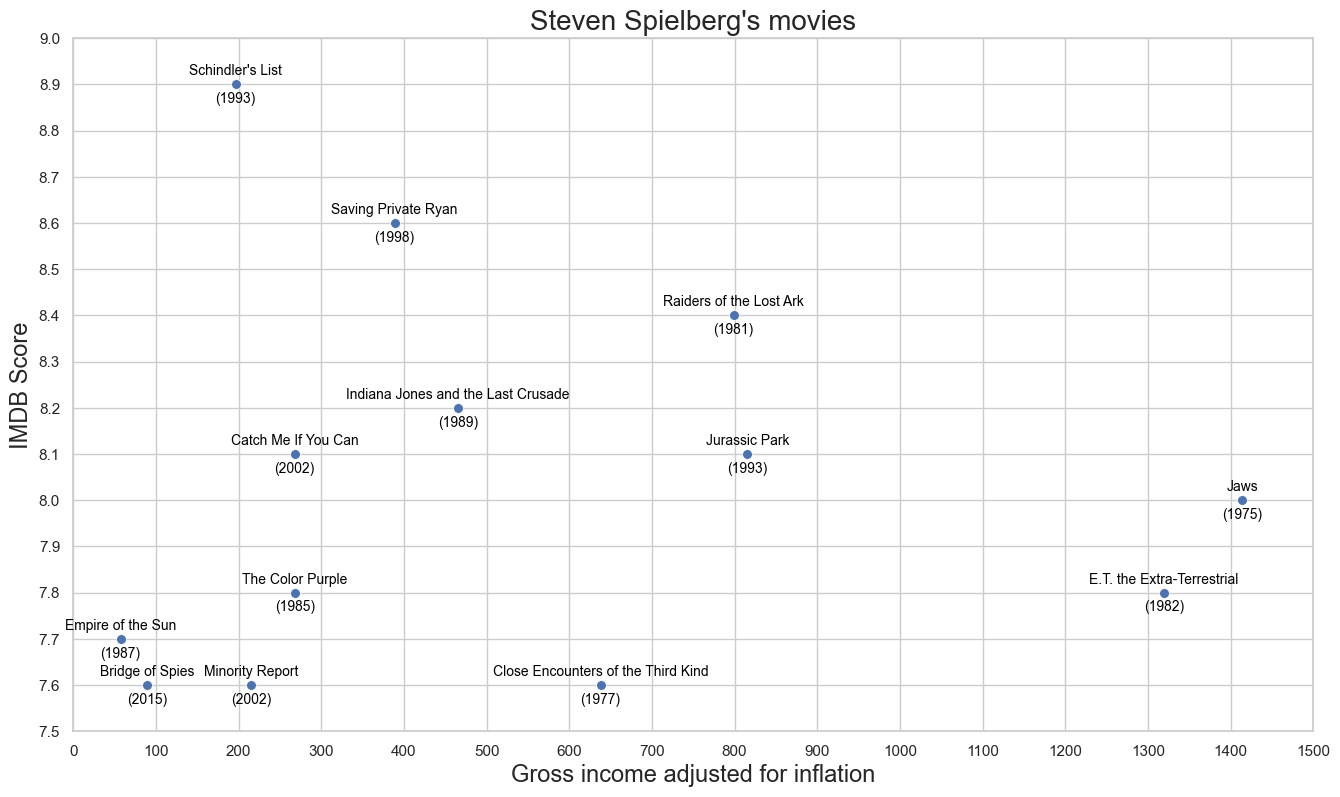

In [304]:
sns.set(style='whitegrid')
fig,ax=plt.subplots(figsize=(16,9))
sns.scatterplot(df_spielberg,
                x='Gross_mln_adjusted',
                y='IMDB_Rating',
                s=50,
                ax=ax)
for i in df_spielberg.index:
    plt.text(   df_spielberg['Gross_mln_adjusted'].iloc[i],
                df_spielberg['IMDB_Rating'].iloc[i]+0.02,
                df_spielberg['Series_Title'].iloc[i],
                horizontalalignment='center',
                size='small', 
                color='black')
for i in df_spielberg.index:
    plt.text(   df_spielberg['Gross_mln_adjusted'].iloc[i],
                df_spielberg['IMDB_Rating'].iloc[i]-0.04,
                f"({df_spielberg['Released_Year'].iloc[i]})",
                horizontalalignment='center',
                size='small', 
                color='black')
ax.set_title("Steven Spielberg's movies",fontsize=20)
ax.set_xlabel('Gross income adjusted for inflation',fontsize=17)
ax.set_xticks(np.arange(0,1501,100))
ax.set_xlim(left=0)
ax.set_ylabel('IMDB Score',fontsize=17)
ax.set_yticks(np.arange(7.5,9.1,0.1))
plt.show()

Spielberg managed to create all kind's of movies in his career. Some of them earning over a billion $ in the box office, like Jaws, or having extremely good ratings, like "Shindler's list". some of his works went under the radar, relatively speaking, like the "Empire od the Sun" or "Bridge of Spies".

## Movie descriptions
What are the most common words used to describe the "best" movies?

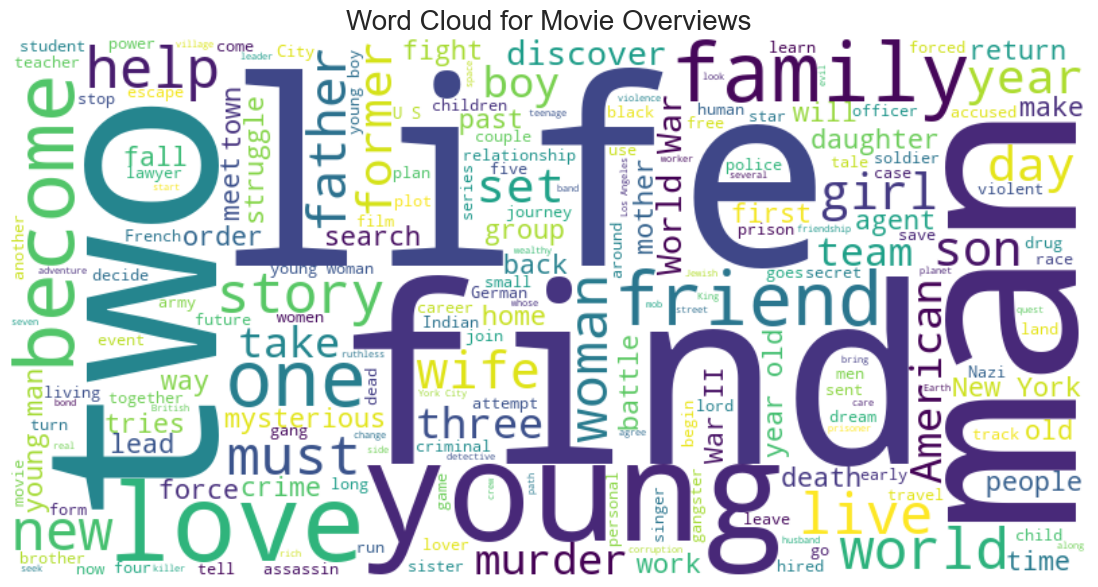

In [305]:
# Combine all movie overviews into one large text string
text = ' '.join(movies_data['Overview'].fillna(''))

# Generate a word cloud image
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text)

# Display the generated image:
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud for Movie Overviews', fontsize=20)
plt.show()
